# Titanic Dead or Alive
This one solve Kaggle basic competition. Data is already downloaded to same notebook folder.

## Inspect data

In [231]:
%matplotlib inline
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
df.info()
print("----------")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non

## Feature engineering
### 1. Embarked

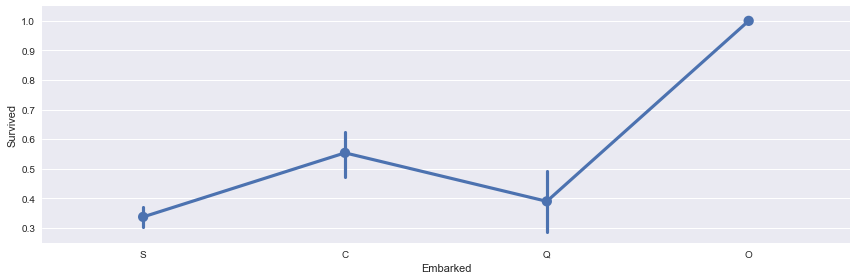

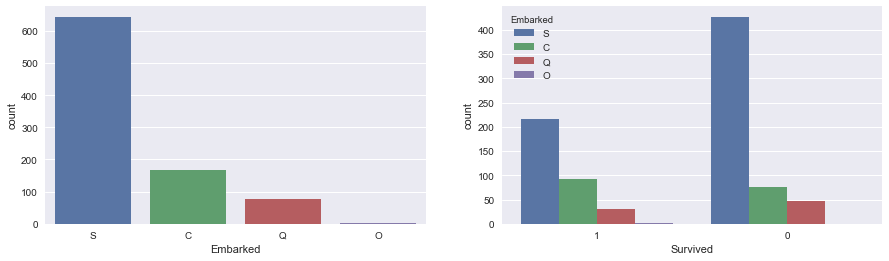

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

df["Embarked"] = df["Embarked"].fillna("O")

sns.factorplot('Embarked', 'Survived', data=df, size=4, aspect=3)
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

sns.countplot(x='Embarked', data=df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=df, order=[1, 0], ax=axis2)

The missing value is only 2 rows and they are most close to label C. We replace them with C.

In [234]:
from sklearn.preprocessing import LabelEncoder

df.loc[df["Embarked"] == "O", "Embarked"] = "C"

# Label encoding
lbl = LabelEncoder()
lbl.fit(np.unique(list(df['Embarked'].values)))
df['Embarked'] = lbl.transform(list(df['Embarked'].values))
df_test['Embarked'] = lbl.transform(list(df_test['Embarked'].values))

### 2. Parch & SibSp

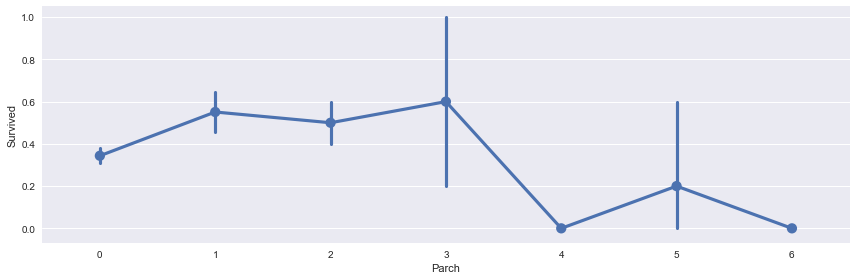

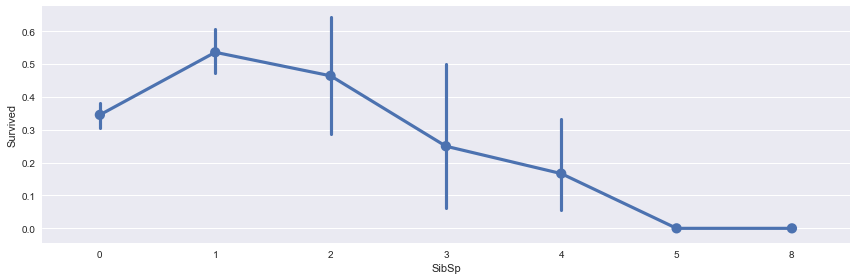

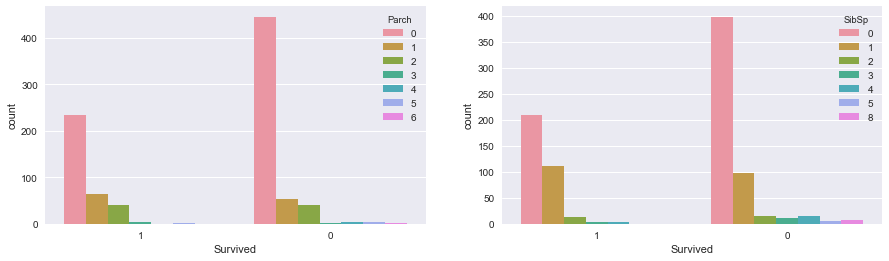

In [235]:
sns.factorplot('Parch', 'Survived', data=df, size=4, aspect=3)
sns.factorplot('SibSp', 'Survived', data=df, size=4, aspect=3)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(x='Survived', hue="Parch", data=df, order=[1, 0], ax=axis1)
sns.countplot(x='Survived', hue="SibSp", data=df, order=[1, 0], ax=axis2)
# sns.countplot(x='Survived', hue="Family", data=df, order=[1, 0], ax=axis3)

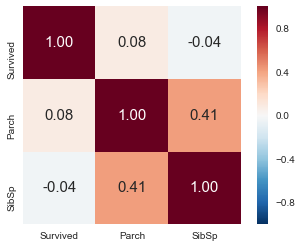

In [236]:
visualized_cols = ['Survived', 'Parch', 'SibSp']
cm = np.corrcoef(df[visualized_cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=visualized_cols,
                 xticklabels=visualized_cols)

The Parch and SibSp look not clear about their relation to the Survived factor
### 3. Sex

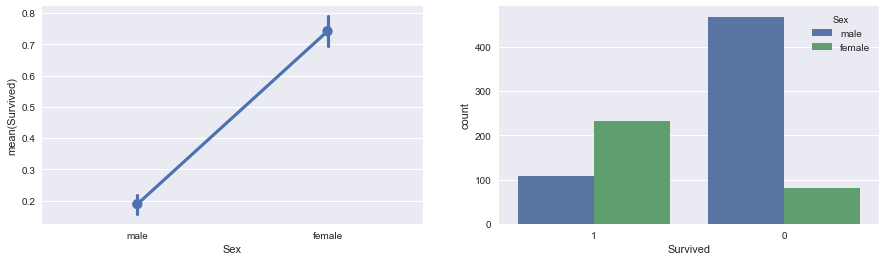

In [237]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
sns.pointplot('Sex', 'Survived', data=df, ax=axis1)
sns.countplot(x='Survived', hue="Sex", data=df, order=[1, 0], ax=axis2)

In [238]:
lbl = LabelEncoder()
lbl.fit(np.unique(list(df['Sex'].values)))
df['Sex'] = lbl.transform(list(df['Sex'].values))
df_test['Sex'] = lbl.transform(list(df_test['Sex'].values))

### 4. Age

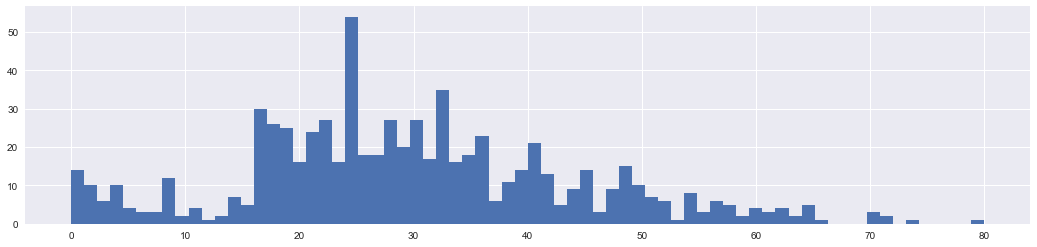

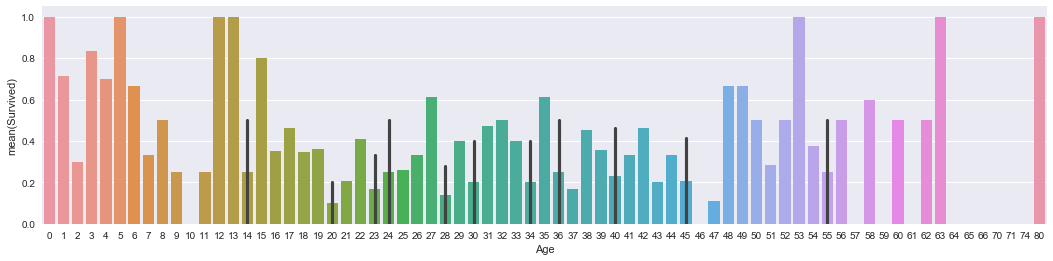

In [239]:
fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))
df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))
avg_age = df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
avg_age.dropna(subset=["Age"])
avg_age["Age"] = avg_age["Age"].astype(int)
sns.barplot(x='Age', y='Survived', data=avg_age)

The data is split into 3 area:
1. Children: High potential survival
2. Adult: Normal
3. Old man: High potential suvival
Non existing should be push to Adult because the have normal distribution & consume most of data

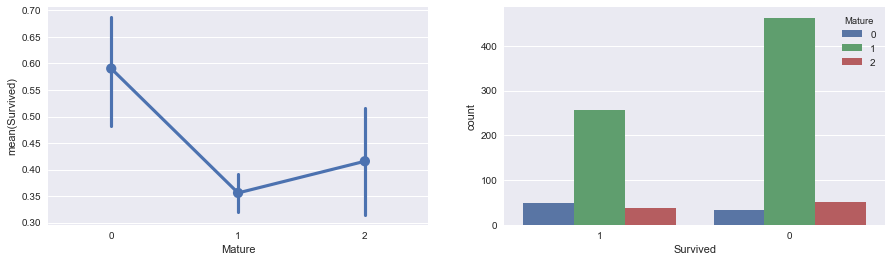

In [240]:
df['Mature'] = df['Age']
df.loc[df['Age'] < 16, 'Mature'] = 0
df.loc[(df['Age'] >= 16) & (df['Age'] < 48), 'Mature'] = 1
df.loc[df['Age'] >= 48, 'Mature'] = 2
df['Mature']= df['Mature'].fillna(1)
df['Mature'] = df['Mature'].astype(int)

df_test['Mature'] = df_test['Age']
df_test.loc[df_test['Age'] < 16, 'Mature'] = 0
df_test.loc[(df_test['Age'] >= 16) & (df_test['Age'] < 48), 'Mature'] = 1
df_test.loc[df_test['Age'] >= 48, 'Mature'] = 2
df_test['Mature']= df_test['Mature'].fillna(1)
df_test['Mature'] = df_test['Mature'].astype(int)

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
sns.pointplot('Mature', 'Survived', data=df, ax=axis1)
sns.countplot(x='Survived', hue="Mature", data=df, order=[1, 0], ax=axis2)

### 5. Fare

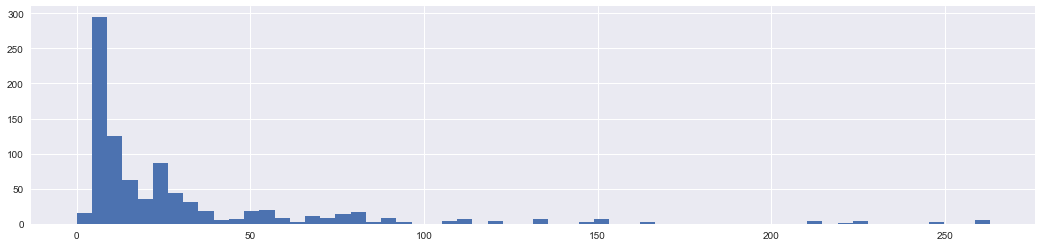

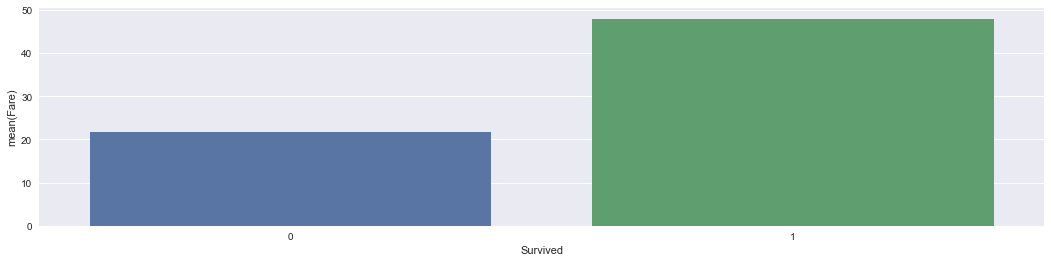

In [241]:
df['Fare'] = df['Fare'].astype(int)

fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))
df['Fare'][df['Fare'] < 300].hist(bins = 60, ax=axis1)
fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))
avg_fare = df[["Fare", "Survived"]].groupby(["Survived"], as_index=False).mean()
sns.barplot(x='Survived', y='Fare', data=avg_fare)

In [242]:
from sklearn.preprocessing import Imputer
# Fill missing value
imr_fare = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr_fare.fit(df['Fare'].values.reshape(-1, 1))
df_test.loc[:, 'Fare'] = imr_fare.transform(
    df_test['Fare'].values.reshape(-1, 1))

df_test['Fare'] = df_test['Fare'].astype(int)

### 6. Pclass

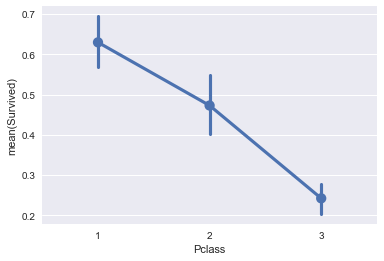

In [243]:
sns.pointplot('Pclass', 'Survived', data=df)

## Training

In [244]:
picked_labels = [
    'Pclass', 'Sex', 'Mature', 'Parch', 'SibSp', 'Fare', 'Embarked'
]
# X_train, X_test, y_train, y_test = train_test_split(df[picked_labels], df['Survived'], test_size=0.30, random_state=1)
X_train = df[picked_labels]
y_train = df['Survived']
X_test = df_test[picked_labels]

# Double check data
def print_label(data, label):
    print(sorted(pd.unique(data[[label]].values.ravel())))


for label in picked_labels:
    print(label + ':')
    print_label(df, label)
    print_label(df_test, label)

Pclass:
[1, 2, 3]
[1, 2, 3]
Sex:
[0, 1]
[0, 1]
Mature:
[0, 1, 2]
[0, 1, 2]
Parch:
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 9]
SibSp:
[0, 1, 2, 3, 4, 5, 8]
[0, 1, 2, 3, 4, 5, 8]
Fare:
[0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 46, 47, 49, 50, 51, 52, 53, 55, 56, 57, 59, 61, 63, 65, 66, 69, 71, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 89, 90, 91, 93, 106, 108, 110, 113, 120, 133, 134, 135, 146, 151, 153, 164, 211, 221, 227, 247, 262, 263, 512]
[0, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 39, 41, 42, 45, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 63, 65, 69, 71, 73, 75, 76, 78, 79, 81, 82, 83, 90, 93, 106, 108, 134, 135, 136, 146, 151, 164, 211, 221, 227, 247, 262, 263, 512]
Embarked:
[0, 1, 2]
[0, 1, 2]


In [245]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clf_svc = SVC(C=0.1, gamma=0.1, kernel='rbf', probability=True)
clf_lr = LogisticRegression(C=0.1)
clf_knn = KNeighborsClassifier(n_neighbors=15)
clf_dt = DecisionTreeClassifier(max_depth=4)
clf_rf = RandomForestClassifier(n_estimators=80, max_depth=5)
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', clf_svc)])
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', clf_lr)])
pipe_knn = Pipeline([('scl', StandardScaler()), ('clf', clf_knn)])

clf_ensemble = VotingClassifier(
    estimators=[
        ('svc', pipe_svc),
        ('lr', pipe_lr),
        ('knn', pipe_knn),
        ('dt', clf_dt),
        ('rf', clf_rf)
    ],
    voting='soft')

In [246]:
from sklearn.model_selection import GridSearchCV


def grid_search(clf_name, X_train, y_train, est, param_grid):
    gs = GridSearchCV(
        estimator=est,
        param_grid=param_grid,
        scoring='accuracy',
        cv=10)
    gs = gs.fit(X_train, y_train)
    print(clf_name, gs.best_score_)
    print(gs.best_params_)


def grid_search_svc(X_train, y_train, est):
    param_range = [0.1, 1.0, 10.0]
    param_grid = [{
        'clf__C': param_range,
        'clf__kernel': ['linear']
    }, {
        'clf__C': param_range,
        'clf__gamma': param_range,
        'clf__kernel': ['rbf']
    }]
    grid_search('svc', X_train, y_train, est, param_grid)


def grid_search_lr(X_train, y_train, est):
    param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
    param_grid = [{'clf__C': param_range}]
    grid_search('lr', X_train, y_train, est, param_grid)


def grid_search_knn(X_train, y_train, est):
    param_range = [1, 5, 10, 15, 20, 25, 30, 50]
    param_grid = [{'clf__n_neighbors': param_range}]
    grid_search('knn', X_train, y_train, est, param_grid)


def grid_search_dt(X_train, y_train, est):
    param_range = [1, 2, 3, 4, 5, 6, 7, 8]
    param_grid = [{'max_depth': param_range}]
    grid_search('dt', X_train, y_train, est, param_grid)


def grid_search_rf(X_train, y_train, est):
    param_range = [80, 100, 120, 140, 160]
    param_grid = [{'n_estimators': param_range, 'max_depth': [3, 5, 7]}]
    grid_search('rf', X_train, y_train, est, param_grid)


grid_search_svc(X_train[:500], y_train[:500], pipe_svc)
grid_search_lr(X_train, y_train, pipe_lr)
grid_search_knn(X_train, y_train, pipe_knn)
grid_search_dt(X_train, y_train, clf_dt)
grid_search_rf(X_train, y_train, clf_rf)

svc 0.824
{'clf__C': 1.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
lr 0.789001122334
{'clf__C': 0.1}
knn 0.830527497194
{'clf__n_neighbors': 15}
dt 0.824915824916
{'max_depth': 7}
rf 0.828282828283
{'max_depth': 7, 'n_estimators': 100}


In [247]:
from sklearn.model_selection import cross_val_score

all_clf = [pipe_svc, pipe_lr, pipe_knn, clf_dt, clf_rf, clf_ensemble]
clf_labels = ['svc', 'lr', 'knn', 'dt', 'rf', 'ensemble']

print('10-fold cross validation:')
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(
        estimator=clf, X=X_train, y=y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(),
                                               label))

10-fold cross validation:
Accuracy: 0.82 (+/- 0.02) [svc]
Accuracy: 0.79 (+/- 0.02) [lr]
Accuracy: 0.83 (+/- 0.03) [knn]
Accuracy: 0.82 (+/- 0.03) [dt]
Accuracy: 0.82 (+/- 0.04) [rf]
Accuracy: 0.83 (+/- 0.03) [ensemble]


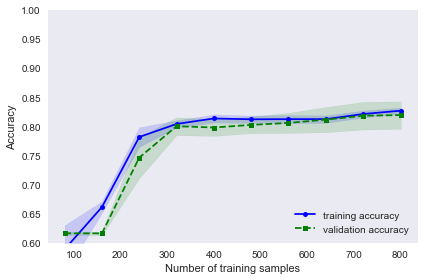

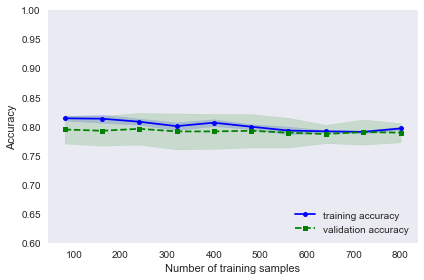

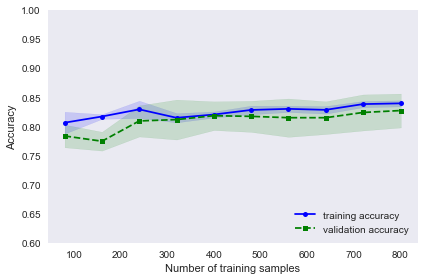

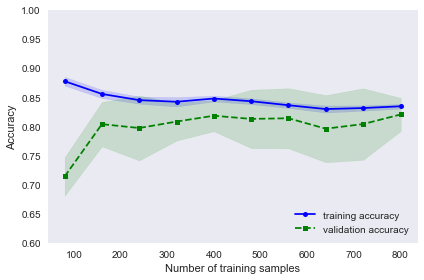

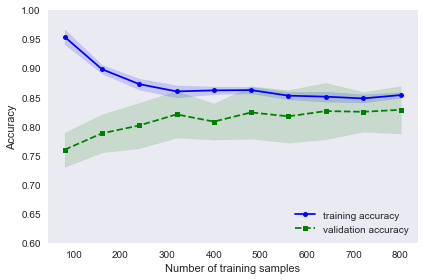

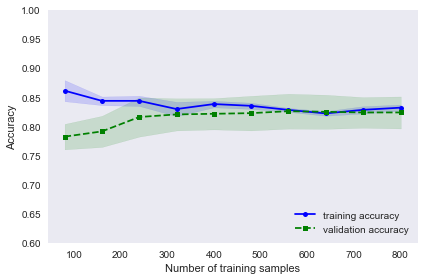

In [248]:
from learning_curve import plot_learning_curve

plot_learning_curve(X_train, y_train, pipe_svc)
plot_learning_curve(X_train, y_train, pipe_lr)
plot_learning_curve(X_train, y_train, pipe_knn)
plot_learning_curve(X_train, y_train, clf_dt)
plot_learning_curve(X_train, y_train, clf_rf)
plot_learning_curve(X_train, y_train, clf_ensemble)

## Prediction

In [249]:
chosen_est = clf_ensemble
chosen_est.fit(X_train, y_train)
predictions = chosen_est.predict(X_test)
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                           'Survived': predictions})
submission.to_csv("submission.csv", index=False)